<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


***


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(20
    )

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


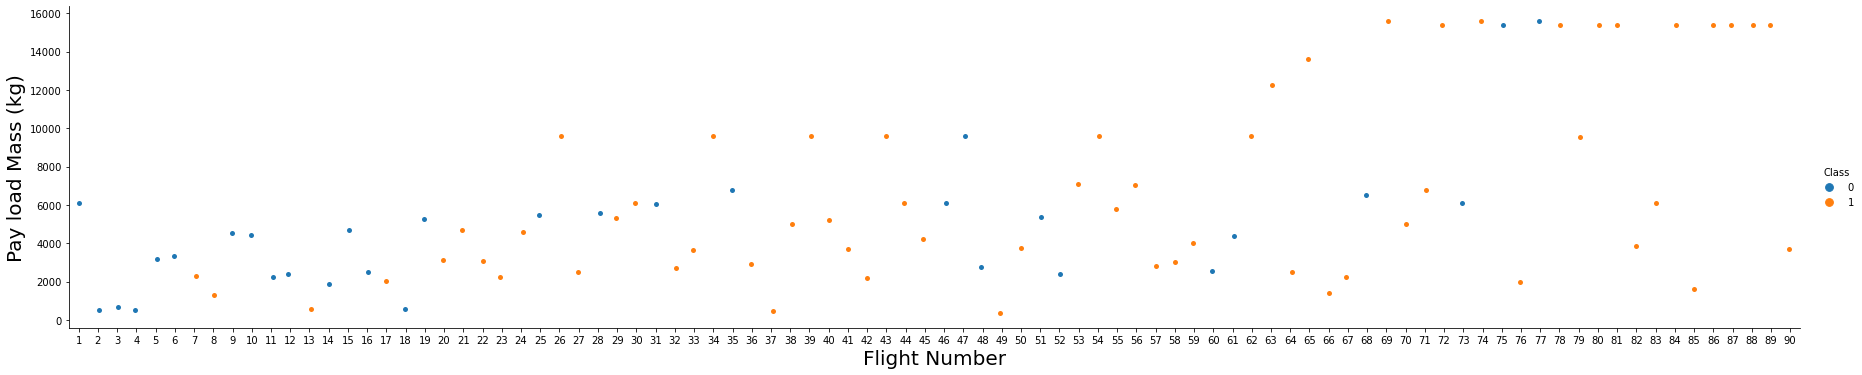

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


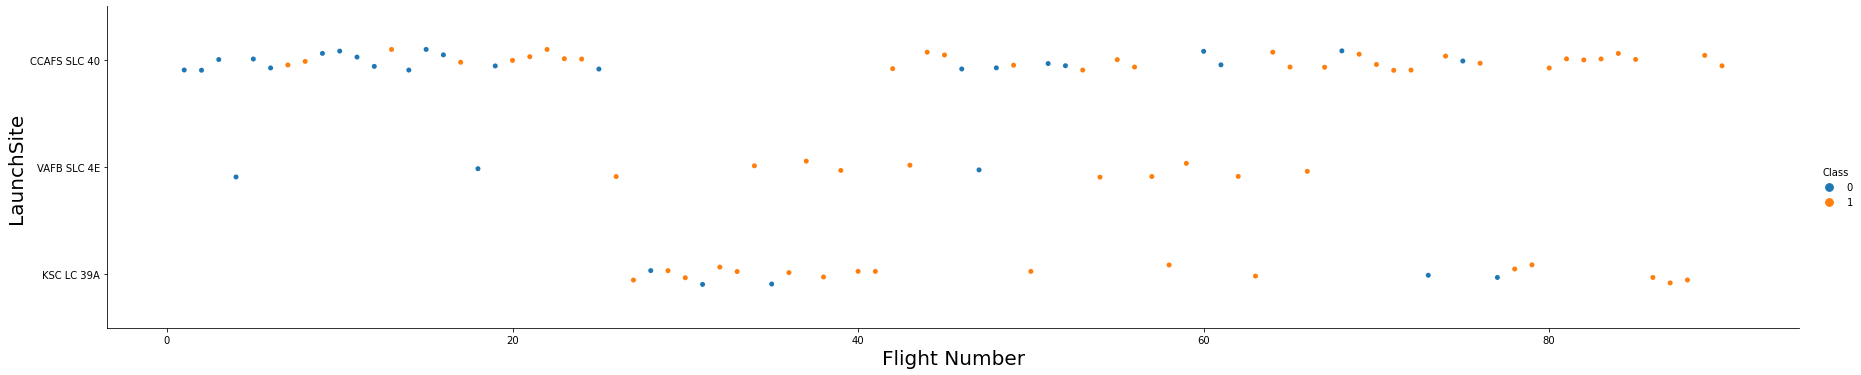

In [4]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


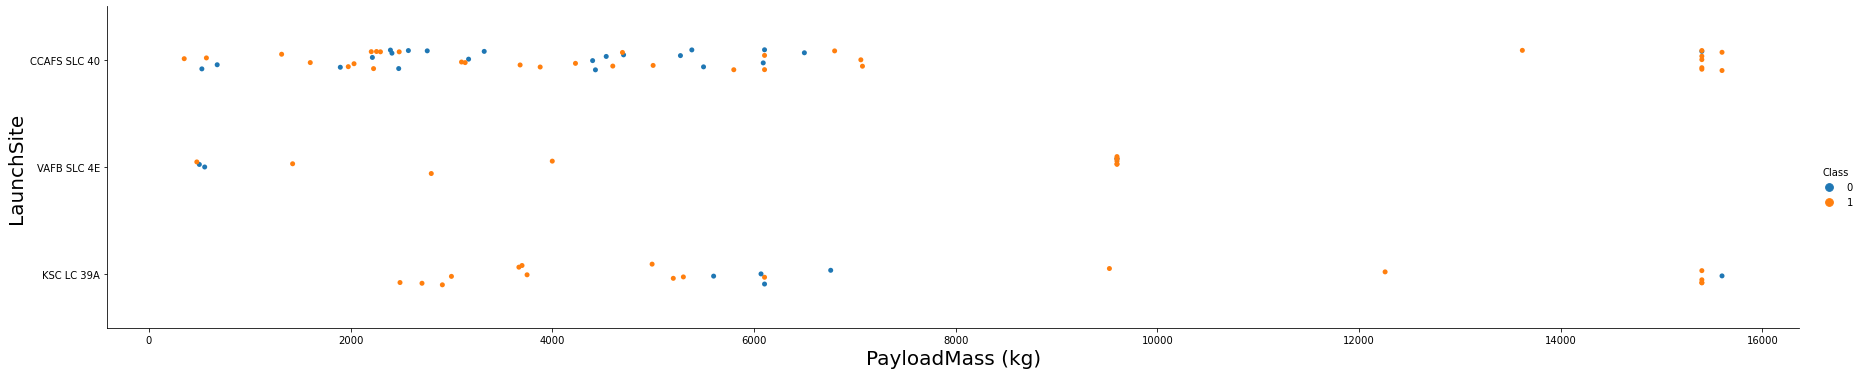

In [5]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass (kg)",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Now try to explain any patterns you found in the Payload Vs. Launch Site scatter point chart.


In [6]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAB0UAAAF3CAYAAADac5O4AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAABYVElEQVR4nO3dd3xeZf3/8dene7eU0lI6aFmllE0pe8kqgjJEAVFAQUSGgIqC64v6QxEHQ1wMQVQ2gsoU2SirQKGUWSh0UFo66aAruX5/nJNmNGnSu0nu5M7r+XjkkZzrXOc6n4Sekt7v+7quSCkhSZIkSZIkSZIkSaWqXbELkCRJkiRJkiRJkqSmZCgqSZIkSZIkSZIkqaQZikqSJEmSJEmSJEkqaYaikiRJkiRJkiRJkkqaoagkSZIkSZIkSZKkktah2AWo4caOHZvuv//+YpchSZIkSZIkSZKk1iuKXUAxOFO0FZk9e3axS5AkSZIkSZIkSZJaHUNRSZIkSZIkSZIkSSXNUFSSJEmSJEmSJElSSTMUlSRJkiRJkiRJklTSDEUlSZIkSZIkSZIklTRDUUmSJEmSJEmSJEklzVBUkiRJkiRJkiRJUkkzFJUkSZIkSZIkSZJU0gxFJUmSJEmSJEmSJJU0Q1FJkiRJkiRJkiRJJc1QVJIkSZIkSZIkSVJJMxSVJEmSJEmSJEmSVNIMRSVJkiRJkiRJkiSVNENRSZIkSZIkSZIkSSXNUFSSJEmSJEmSJElSSTMUlSRJkiRJkiRJklTSDEUlSZIkSZIkSZIklTRDUUmSJEmSJEmSJEklzVBUkiRJkiRJkiRJUkkzFJUkSZIkSZIkSZJU0gxFJUmSJEmSJEmSJJU0Q1FJkiRJkiRJkiRJJc1QVJIkSZIkSZIkSVJJMxSVJEmSJEmSJEmSVNIMRSVJkiRJkiRJkiSVNENRSZIkSZIkSZIkSSXNUFSSJEmSJEmSJElSSTMUlSRJkiRJkiRJklTSDEUlSZIkSZIkSZIklTRDUUmSJEmSJEmSJEklzVBUkiRJkiRJkiRJUkkzFJUkSZIkSZIkSZJU0gxFJUmSJEmSJEmSJJU0Q1FJkiRJkiRJkiRJJc1QVJIkSZIkSZIkSVJJMxSVJEmSJEmSJEmSVNIMRSVJkiRJkiRJkiSVNENRSZIkSZIkSZIkSSXNUFSSJEmSJEmSJElSSTMUlSRJkiRJkiRJklTSDEUlSZIkSZIkSZIklbQOxS5AaskmzVrEP8ZPp1eXjnxu9BB6d+tY7JKkFm/xspVc++Rk3vhgIfuM2IDP7jSYiCh2WZIkNb9X7oAX/gLd+sJe34QBo4pdkSRJkiRJbZahqFSH12Z8xJG/+y9LV5QDcPNzU7jv7L3p1MEJ1tKanHXTizz8+iwA7pkwgzmLlvO1fTctclVS03hp6nwmTF/Arpv0ZbP+PYtdjqSW5M0H4PYvVx6//TCc/TJ06VW8miRJkiSpmKaNg/E3Qtf1YMyp0HNAsStSG2MoKtXh5menrApEAd7+cDFPvPUh+4/0L2q1PBOmLeD1Dz5ij836sVGfrkWrY+7i5asC0Qq3Pz/VUFQl6Q+Pvc3F970OQLuAS4/ZnsO3H1TkqiS1GK/+o/rxx/Ng8mMw8lPFqUeSJEmSimnqc3DdWChfmR1PuA3OfA46dC58zDlvw/PXQUqw00nQb/NGKVWly1BUqkPnju1Xb+uweptUbJf/5y0u/c+bAHRq346rTtiJfUf0L0ot3Tq1p3un9ixeXraqrV+PdfjFRmqhVpaVc+XDk1Ydlye44qG3DEVVu8Vz4K0HoMcA2GQ/aOeqE21Cn6G1tG3c/HVIkiRJUkvw4l8qA1GA+e/B24/AiLGFjffRDPjDnrBiSXb83DVw5jjoM2Tda1XJ8hUZqQ5f3HVj1u/eadXxmGF92X1oV3jiV3Dbl7L9oVIqYoVazfQX4PrD4LJt4MEfQtnK+q9pBDM/Wsr37pzA8dc8zZ//9y6pGf9cLF62kt89WhnMLC8r54qH3lrncQv9Hrp0bM95B4+gXb6FaI/OHfjWwSPWuR6ppSlLieUry6u1VV1dQFpl1uvwmx3grq/BX4+C205ovnuvXAb3nQ9XjoF/ngXLFjbfvQW7fBUG7ZR9He1g19Nh4LbFrUmSJEmSiqVrn4a1NdRTv60MRAFWLoUnf134eGoTnCkq1WFI32785xv78O9XP6B3147sP3IA7W77Irx+d9Zh4t9h0Qew93nFLVSZlcvgxs/B4g+z4/9eDl36wF7faPJbn3Tdc7w246PstpPmsKKsnFP22qTJ7wuwoqyc5WXVg5jFy8pgyVx4/0UYuD10X3+txvzFA69z/X/fpWOHdpz1ic05ec/ha3X9SXsMZ/+RA3hr1kJ22rgvvbt2XKvrVWTLFmbLlyxbCFt/BnoPLnZFLVLnDu35/C5Duf5/765qO2n3YUWrp8kt/Sj7e7bHBsWupPV56kpYuqDy+LV/wYyXmyccu+nYbB9LgNlvwPvj4bQnmv6+ynRdD77yMMycCF16+/epJEmSCvfxfJg/BfpvBe19SV+t1JivwoTb4aPp2fGIT8LQXQsfb8HU1dsqxpbq4N+g0hqs170Tx+ycL3328Xx4/Z7qHcbfaCjaUnwwoTIQrfD2w00eir794aJVgWiFu1+e0WyhaJ9unThr87m8O+k1Hi/flvn05Dubvgu//hys/Bjad4bPXANbfbpB493/ygx++8jb2cHyMn5y96uM3ng9thvSZ63qGtK3G0P6dlu7b0bFt3IZXHMgfPhadvzEr+DUR6Fv8/x5bm1+eNhW7DC0Dy9PW8Dum65funtOP/IzePJSKFsOIw+Do66Bjl2KXVXrseLjWtqWrN7WFN55tPrxBy/DyuXQoVOt3duMj+fBv86Gtx6E/iPhsMuaNqQeMKrpxpYkSVLpG38j3P2N7HWe3kPhC7fDBq7KpVao9yD4zLXZbM7uG8ABF67beNseA6/etXqbtAYunys1VMeu0Lln9bbuzphpMdbfFDp0rd624TZNftt+PTrTuUP1v0oHrdd19Y4pwYqljV/A3efyjSlnckWn3/J8l9N5s/eZfGLCd7JflAHKlsED323wcC9OmV9L27xGKlYt3lsPVgaikM1ue/7P6zZmSjD5CZh4Z8kt3dmuXXD49oP4wWFb1RuI/ufVmex9ySNs8f37OO+2l1i6omyN/VuMGS/BYxdnf5eQslmOL6zjn4m2ZvSXIKrsST5wOxg8pslvO33+x7yf+q5+Ivz1n39/H179RxZOT38ebv0ilLv8tSRJklqg5Uvgviqv8yyYAv+5sKglSQWb9jz8+VPw1r9h/N/g2oOyN+gXastPwu5nQ/uO0K4j7Po1GHVU49WrkuSrIlJDdegM+/+w8sXEjt3hEz8obk2q1HU9OPxK6Jq/ALzJfs0yi7d3145ccMiWdGyfbaI5qE9XvnHgFtU7vXEf/HoruGhDuPHY6ssorov5U2DcdasO21NGp2VzV5+BtGhmg4fcedjqL6CPrqVNJSqiYW1r45YvwJ8Pg9tOgt/sBPPeXbfxWoCn35nDJfe/zj/GT6esvP79dxcsWcGZN73AlLlLWL6ynNuen8bVj7/TDJU2glmv19L22uptqtuwPeGU/8BuZ8JB/w9O/Be0a9pfwVeWlXPcVU9zzrKvMT91z9pSO9jsAJfaAnjvqerH896FhTOKUookSZK0RkvmwLLqK5SVwr+r1Ua9eAOUr6g8njd59RWO1tZBP4bzp8EFU2Hsxev+OpZKXlFfFYmIDYHLgJ2BZcC7wDkppTcjYov83BbACmACcFZKaWZ+7eXA0cCQlFJ53nYS8AugYuHol1NKJ0TEYcBPyELgjsDlKaU/1qhlAHAtMCTv825K6ZMRMQy4O6W0dS31fws4BVgJlAG/SindUMf3+q28tg1SSrPztguAk/Nrv55SeqChPzsVyZivwOYHwaxXYcgu0M2wqEXZ5mjY6nBYvigLSZvJSXsM57DtNmLavI/ZeqNedGhf5cXuZQvhjq/A8nyG3Jv3waMXw9ifwbRx2Ybg5Sthl9Ng2B5rd+Nli4D6Axm2/VyDhzxgqwGcd/AIrvvvZDq1b8dZ+2/O1oN6r11dbcXyJdkG7t36ct+EGTw5aTajNurN50YPrv5noDXZ7EAYsDXMfCU77roe7Hhi4eNNe75yH2bIAvqnfw+H/Hzd6lwXKWVLZxb49/et46by7dtfXnX81NtzuPgza152c+KMBSxdUX0W2guFzsAuL4N27evv11iG7w0dumR/1itscXDz3b9UDNox+2gm46fOZ8rcJUxhJLsuu5KRMYVBA/px5eePa7YaWrTBO8PctyuPew+BnhsWrx5JkiSpLn2GwEY7wvsvVLZtdXjx6pHWRc1VGOtqW1tu8aO1ULRQNCICuBP4c0rp2Lxte2BAREwB7gG+kVL6V35uP2ADYGZEtAOOBKYCewOPVhn6lpTSmVXu0xG4ChiTUpoWEZ2BYbWU9GPgwZTS5fl1a3yFMyJOAw7Mx/0oInoDR9TRd0jed0qVtq2AY4FRwEbAfyJii5RSK1lPrw1bb+PsQy1T+47NGohW6NejM/16dF79xJxJlYFohfdfzN7Vd/1hlcufvHEfnPZEtrdZQw3YKgvnpz6z+rlu62fnBu8Mu53R8DGBM/bbjDP226z2k6/+Ex74XhZubfs5OPTXbXNvuv9eAY/+DFZ8zOR++3LOtBNZRvZzeHHKPH7x2e2KXGCBOnSCk/9dudTtqCPXLShYVsus6KUfrd7WXN5/Ee44JXsu+28FR18H/bdcqyH+9OTkase3PT+N7x46kl5dOtZ5zaiNetO1Y3s+rrJkbrUZ2E//ASbcCj0Hwn7frX3/wVmvwZ2nwYzxMGRXOOqPsN6wtaq9IL0Gwudvhcd+nr07efSXYcQhTX9frZMBvboQkb0HYCmdeTFtzlYbD23eQL0lO/ii7B33k/6T7cX06Sv92UiSJKnlOu4meOSnMPvNbLLGHmcXuyKpMGO+Ci/fBos+yI43OxA23r24NanNKeZM0f2AFSmlP1Q0pJTGA0TEl4GnKgLR/NwjNa59BbgFOI7qoWhNPcm+zzn5OMuAN2rpNxD4d5X7vVxLn6q+C+yXUvoo778AqGuTrUuBbwP/qNJ2OHBzXs/kiJgEjAGequV6qXVaOBPezYO+2l7kbws2GAnd+sGS2ZVtw/eG1++tDEQhWzri1X+uXSgKcPztMO5P8MGEbF+0eZNhveHwmWtg8OjG+R4qLJ6dBUpl+Vr/L/4F1t8M9jynce/T0s1+Cx6sXDp7+OxHOKH9QK4uOwyAO1+czo8OH0W3Tq10icpO3WGHLzTOWMP2gvU3hzlvZcfRHnb8YuOMXYi7zsgCUchm/N99Dnz5/rUaomONWcDtI2hXz9Isvbt25HfH78hP7n6VGQuWcsQOG3HKXsOzky/8Be7/TmXnqc/AOROyfayruvOr2f6eAFOfhn+dDSf8g2axyT7Zh1qNIX27cfq+m/K7R98mJRjatxun1/Vml7aoez/4wu3ZPqJNvJSxJEmStM56bgifvqLYVUjrrs8QOGscvPVgNqllk32LXZHaoGK+Yrs18HwB5yALQm8iCxl/GhEdU0oVi1EfExF75l9fnlK6LiL+CbwXEQ8BdwM3VSy5W8VvgVsi4kzgP8B1KaX3a7t5RPQEeqaU3q7tfI2+nwamp5Reiuovmg4Cnq5yPC1vq3n9qcCpAEOHDq3vdlLL8c5jcOPnKpdc/MQPYO9vFbemYujYJXtH3/0XZLNDRx0Be30T3qwliOm92l8B9evSq3oo+fE86NKnadbPnzG+MhCtMO25xr9PSzfr1dWatmw3NVsIHejSsT0dCniRvbw80a5die170L5jFjo+d00Wqm97DAzZuTi1lJfBrInV2z6YsNbDnLHfppxx44ur9hL90p7D6NG5/l+n9tuyP/tt2X/1E2/cW/148YfZczV878q2shWVgWiFaWv6NUmC8w7ekmN3HsrMj5ay/ZA+rXdZ76ZkICpJkiRJzWv+1Ow1jq7rwcDt3J5Oza7VTWOJiE7AJ4FzU0oLI+IZ4CCy5XahxvK5ACmlUyJiG+AA4FtkS9meVKPPAxGxCTAWOAR4MSJW20e0ogwasJFfRHQDvpfXV9sYNa02ZkrpKrLlfxk9enQDNg+UWohHL66+B93jv8z2zezco3g1FcuQMfCVh6q3jTgUtjgk22MUYPg+sPXR636vplw6eOAOq+8tOHTXprtfS7XxHtCha7WZvk+kyuVyv77/ZnTq0PAX2u+bMIMf3/0qsxct49PbDeKiI7emS8cSWsaxez/Y9/xiV5EtjTlsr2z2eoUC3pE4duuB3H92D56cNJsRG/Zk9037rVtd629a/TjaZbO9q2rfMVsKu+qbEFxeRg0wpG83hvTtVuwyJEmSJEnKtjW65gAoX5kdP3c1fH189rqH1EyKGYpOBOpKACYCda3TNhboDUzIZ152A5ZQGYrWKqU0Ib/mL8BkaoSieZ+5wI3AjRFxN9l+patNxcj3EF0cEZuklN5Zw203BYYDFbNEBwMvRMQYspmhQ6r0HQzUOjNVapWW1thLcOVSWLmsbYaitWnfAT5/M8x8NftFYOAatzFeNx/NgAcugOkvwPC94KCLoGuftR+n+/rw2eur7Cl6TBZ0tzXd+8Hxt8EjF8GSubDjCXxr5JfZ6525bLVRL0YO7NXgoeYsWsbZt4xn+cps8YI7XpjGJht0r3tPV62bo66G+87LZlluvDsccklBw2w+oCebD+jZODXtcS689xRMHwftO8Mnvp8tJ1PTUVfBP7+ePcfD9oBPXd449y8Bk2cvpleXDqxf277Obdy8xcv50b8m8szkuWw7uDcXfnoUA3t3rf/CZjRn0TImz17M1oN6l9YbQqpa8TH87zfZMvcb7w67nu4/+iVJkiS1PQ9eWBmIAiyYlm0nts1nilaS2p5ihqIPky19+5WU0tUAEbEzWch5I3BBRByaUronPzcWmE62dO4pKaWb8vbuZHty1vo2+IjoAYxOKT2aN20PvFdLv08AT6eUluTL424KTFlD/T8DfhsRx+QhaS/g2HxmJ7AqiF21Vl5EvJvXMjtf0vfGiPg1sBGwOfDsGu4ntS47nQj3fbvyeORhWaim6gZs1fT3uOMUeO/J7OsX38vC6c9cU9BQC4YcwP/2256h63dj1Ea9G7HIVmb4XjC8cgnkwcDgndZ+NtarMz5aFYhWeHHK/HUsTnXqNRCO+Wuxq6iu+/rZTPK572Qzveua7d13Ezjp7uatrYVb8PEKTr7+Oca9N48O7YIz9tuMcw/cothltSjfu2sC9074AIAZC5Yyf8kKbvnqbkWuqtKt46by/TtfYXlZOf16dOL6L41h60El+P+Wf54FE27Lvn7zfvjofTjk58WtSZIkSZKa26IZq7fNmdT8dahNK9pGOimlBBwJHBgRb0fEROBC4P2U0sfAYcBZEfFWRLxKNrPzI+BgqswKTSktBp4EPlXHrQL4dkS8ERHjgR9RyyxRYCdgXES8DDwFXJNSqlinbkRETKvy8Vng98AjwHMR8QrwGNmM1YZ+/xOBW4FXgfuBM1JKZQ29XmrxdvkqfO4G2OGLcPDP4KjCQjitoxVLKwPRCpP+U9BQE6YtYM9LHuZrf3uBQ694kp/d+1ojFLhmKSWeeOtDbh03ldmLltV/QSuzzaDedK0xM2rM8CZcAlktV99Nmnb56xJ07ZOTGffePABWlicuf+gt3v5wUZGralmeeGt2teNnJs9d7Y0YxbJ0RRk/uftVlpdl9cxetJyf3/96katqAmUr4ZW/V297+dbi1CJJkiRJxTTikyxPla+DfZw6wlZHFK8etUlF3VM0pfQ+8Lk6zr1OtlRuTavtvJtSOqrK4fU1zi0k24O0vlp+AfyilvZ3gbrWt7ok/2iQlNKwGscXARc19HqthZkT4ZGfwsIZ+RKfXy12RW3TVodnHyqejl2g76Yw9+3Ktv6j6uz+1NtzmPj+AnbdZP3VZuv85uG3WLi0comLa56czMl7Dad/zy6NXnaFr988nn+9lK0s3rNzB2756m5stVHDl6dtdGUrs6WPG0mfbp343Rd25KJ7XmPmR0s5codBfGmP4fVfKJWwOYuW8cbMhWwzqDc9u9S9xOi7sxfX2rbpBi7TXmGrgb14ZvLcVceb9++xVnseN6WFS1dW+38KwPT5H9fRuxVr1x569M9+J63Qc2Dx6pEkSZKkIvnf4K/wtWUjOaDdC8yjBxM7bs0jfTZl7ddekwpX1FBUahIrPoYbDofFH2bH05+HTt1hhy80axn3TpjBRfe8xuxFyzhqx8H8+PBRdGzfMl6IVBtzxO/hjpNhwVTotwUc+qtau1364Jtc/tBbAETAL4/ejs/sNHjV+QUfr6jWv6w8sWjpSvo30taKNb01c+GqQBRg4bKVXP3EO1x6zPZNc8M1mfM23PlVmPYcDNwejvwj9N+yUYbeb0R/9hvRv/6OUhvwr5fe55u3vcTyleX06NyBq07Yid037Vdr34NHbcg/q/wd0btrR3bZpP5l2mcvWkbfbp1o1y4are6W6qIjt+aMv73IGzMXsvH63fjFZ7crdkmrbNCzM7tu0pen36kMbT+17UZFrKiJRMDYn8Hfvwply6Bjdzj4/xW7KkmSJElqdne9MpsF9OCO8r2zhmXw5FuzOWjUhsUtTG2KoahKz9RnKgPRCq/f26yh6IcLl3HOzeNXLQl307NT2HSD7pyy1ybNVoO0ytBd4OyXYPFs6Dmg1i7LV5Zz1ePvrDpOCX776KRqoeixY4ZUm3E0ZlhfNmnCGVkfr1h9RfEly1fW0rMZ/OvsLBAFmDEe7joNTn20OLWoTXtl+gKeensOowb1qjMsbK3KyxM/vvvVVcu7Llq2kp/e+xp3n7VXrf0P3XYgC5duw23PT2P97p34+v6b06Nz3b/avjlzIaf/7QUmzVrEkL5dueLYHdhhaGkvWbxZ/548cO7ezFu8nD7dOhLRsoLgP3xhJ37z8CTenLmQfbbYgC+X6kz5UUfCsL1h5gTYaAfoUoL7pkqSJElSPfr37MI28Q6faf84C+jBX1YeSP9eTbcCnVQbQ1GVnr6bQLSDVGXPrPU3bdYSJkyfvyoQrfD8e/M4pfbXdaWm1659nYEoQCJRnlK1trLy6sdH7jCYXl06cv8rHzCsX3dO2G3jJim1wjaDerPD0D68OGU+AO3bBV/YtWnvWafpz1c/fv9FKC+Hds7+VvP5+wvT+OZtL1HxqH59/835xoFbFLeoRrSivJw5NfYO/mDB0jVec+yYoRw7ZmiDxv/+na8waVa25+jUuR9z3u0v859v7FNYsa3Met07FbuEWvXp1okfHLZVsctoHt3Xh032LXYVkiRJklQ0p2wyh7OfupCOZJMeju/6NP0GfqbIVamt8dVclZ4+Q+GAH0H7ztnx4J1hz3ObtYRtB/dZbc+u0cNW2w5XajE6d2jPF2sEjrXNbN5/5AB+8dntOGO/zda4119jiAj+cvIu/OCwrfjKXsO542u7s9fmGzTpPeu08e7Vj4fubiCqZvfbRyZR9b0LVz/+zqpZlaWgc4f2HLJ19b0WD99+UKON/9qMj6odT5q1iBVlpfPzkyRJkiSpJevz+i2rAlGAfiveh3ceLV5BapOcKarStMfXYccvwsfzspmjzaxfj8785rgd+Om9rzF74TI+s9NgTmziWXXSuvreoSMZPawvr0xfwO6brd8ilubs0bkDJ+/ZApZT/PRvsiV033sKBu8En7qi2BWpDao5e7ssrT7Du7X75We3Y9P+PZgwbT67b9qPL+0xrNHG3nuLDbhnwoxVx7tvur57fUuSJEmS1Fw696qlrWfz16E2LVKJvZhWykaPHp3GjRtX7DIkSVIR/OXp9/jBXa+sOj55z+FtZ+nRRjB/yXJ+fPerPPPOXLYf0ocffmorBrh3iSRJkiRJzWP+VLj2QFiYv2F584Ph+FuLW1PbFsUuoBgMRVsRQ1FJktq2p96ew//ens2ojXpz8KgBRLTJ318lSZIkSVJrtGwRTHoQuvaF4XuDr2sUU5v84RuKtiKGopIkSZIkSZIkSVpHbTIUdSMlSZIkSZIkSZIkSSXNUFSSJEmSJEmSJElSSTMUlSRJkiRJkiRJklTSDEUlSZIkSZIkSZIklTRDUUmSJEmSJEmSJEklzVBUkiRJkiRJkiRJUkkzFJUkSZIkSZIkSZJU0gxFJUmSJEmSJEmSJJU0Q1FJkiRJkiRJkiRJJc1QVJIkSZIkSZIkSVJJMxSVJEmSJEmSJEmSVNIMRSVJkiRJkiRJkiSVNENRSZIkSZIkSZIkSSXNUFSSJEmSJEmSJElSSTMUlSRJkiRJkiRJklTSDEUlSZIkSZIkSZIklTRDUUmSJEmSJEmSJEklzVBUkiRJkiRJkiRJUkkzFJUkSZIkSZIkSZJU0gxFJUmSJEmSJEmSJJU0Q1FJkiRJkiRJkiRJJc1QVJIkSZIkSZIkSVJJMxSVJEmSJEmSJEmSVNIMRSVJkiRJkiRJkiSVNENRSZIkSZIkSZIkSSXNUFSSJEmSJEmSJElSSTMUlSRJkiRJkiRJklTSDEUlSZIkSZIkSZIklTRDUUmSJEmSJEmSJEklzVBUkiRJkiRJkiRJUkkzFJUkSZIkSZIkSZJU0gxFJUmSJEmSJEmSJJU0Q1FJkiRJkiRJkiRJJc1QVJIkSZIkSZIkSVJJMxSVJEmSJEmSJEmSVNIMRSVJkiRJkiRJkiSVNENRSZIkSZIkSZIkSSXNUFSSJEmSJEmSJElSSTMUlSRJkiRJkiRJklTSDEUlSZIkSZIkSZIklTRDUUmSJEmSJEmSJEklzVBUkiRJkiRJkiRJUklb51A0ItaLiCGNUYwkSZIkSZIkSZIkNbaCQtGI6BERv4qID4DZwOQq53aJiHsjYsfGKlKSJEmSJEmSJEmSCrXWoWhE9AaeAs4F3gdeA6JKlwnAXsBxjVGgJEmSJEmSJEmSJK2LQmaKfg8YBZyUUtoRuK3qyZTSEuAxYP91L0+SJEmSJEmSJEmS1k0hoehRwAMppRvW0Oc9YFBhJUmSJEmSJEmSJElS4ykkFB0MvFxPn0VA7wLGliRJkiRJkiRJkqRGVUgouhDoX0+f4cDsAsaWJEmSJEmSJEmSpEZVSCj6HHBYRPSs7WREDAQ+CTy5LoVJkiRJkiRJkiRJUmMoJBS9HFgfuDciRlY9kR/fBnQBrlj38iRJkiRJkiRJkiRp3XRY2wtSSg9ExIXAhcArwAqAiJgNrAcE8J2U0v8ar0xJkiRJkiRJkiRJKkwhM0VJKf0Y2B/4JzAPKAMScC9wQErpF41WoSRJkiRJkiRJkiStg7WeKVohpfQI8Egj1iJJkiRJkiRJkiRJjW6tZ4pGxAkRsW09fbaJiBMKL0uSJEmSJEmSJEmSGkchy+deDxxRT59PA9cVMLYkSZIkSZIkSZIkNaqC9hRtgPZke4xKkiRJkiRJkiRJUlE1VSi6BTCvicaWJEmSJEmSJEmSpAbr0JBOEfGnGk1HRMSwWrq2B4YCewH3rFtpkiRJkiRJkiRJkrTuGhSKAidV+ToB2+cftUnAM8C5hRYlSZIkSZIkSZIkSY2loaHo8PxzAO8AlwGX19KvDJiXUlq87qVJkiRJkiRJkiRJ0rprUCiaUnqv4uuI+BHwSNU2SZIkSZIkSZIkSWqpGjpTdJWU0o+aohBJkiRJkiRJkiRJagr1hqIRMTT/cnpKqazKcb1SSlMKrkySJEmSJEmSJEmSGkFDZoq+CyRgJPBmleP6pAaOL0mSJEmSJEmSJElNpiGh5Q1kAeeCGseSJEmSJEmSJEmS1OLVG4qmlE5a07EkSZIkSZIkSZIktWTtil2AJEmSJEmSJEmSJDWlRtnzMyI2APYAAngqpfRBY4wrSZIkSZIkSZIkSeuqQTNFI2L7iPhxRGxfy7mTgfeAO4Dbgfci4uxGrVKSJEmSJEmSJEmSCtTQ5XO/AFwAzKjaGBHbAn8AugD/Be4HyoBfR8TujVinJEmSJEmSJEmSJBWkoaHoHsDzKaWZNdrPBNoDP0kp7Z1SOhQ4KD93WiPVKEmSJEmSJEmSJEkFa2goOgR4vZb2A4ClwMUVDSmlJ4GHgd3WuTpJkiRJkiRJkiRJWkcNDUX7AdOrNkREX2AY8ExK6eMa/ScCg9a5OkmSJEmSJEmSJElaRw0NRVcAfWu07ZB/fqGW/ouBVGhRkiRJkiRJkiRJktRYGhqKTiJbKreqg8iCz6dr6T8Q+GAd6pIkSZIkSZIkSZKkRtHQUPRfwKYRcVVEbBsRRwOnke0n+kAt/XcFJjdSjZIkSZIkSZIkSZJUsIaGor8C3gNOBl4EbgF6ApemlD6q2jEitgK2BB5uxDolSZIkSZIkSZIkqSAdGtIppbQgInYHfgLsBswBbkkp/baW7p8EXgLuabQqJUmSJEmSJEmSJKlAkVIqdg1qoNGjR6dx48YVuwxJkiRJklSfpR9BBHTuWexKJEmSpJqi2AUUQ0OXz5UkSZIkSVJ9ysvhnm/CJcPhkk3gge8VuyJJkiRJGIpKkiRJkiQ1ntfvhueugfKVULYcnroSJv2n2FVJkiRJbV5BoWhE7BMRd0fErIhYERFltXysbOxipSa1Yim8+W+Y/kKxK5EkSZIktVYzJzasTZIkSVKz6rC2F0TEocBdQHtgCvAGYACq1m3BNPjTWFgwNTve9lg46o/FramtWTQL3n0C+o+C/lsWuxpJkiRJKsxm+8NjF686TASx6SeKWJAkSZIkKCAUBS4EVgCHppT+3bjlSEXy1O8qA1GAl2+G3U6HgdsVr6a25J1H4cZjYOXS7PiAC2HPc4tZkVqqGS/Dgz+E+VNg1BGw73ehfSH/K5MkSZKaxvz1t+e3nc7mqKV3UkY77ux2NOeuN5IexS5MkiRJauMKeSV5a+BmA1GVlCWzV29bXEubmsYjP60MRAEeuwTGfBU6dSteTWp5Vi6Hv30WFn2QHT/xK+jUA/b6RnHrUuMrWwkrFkOX3sWuRJIkaa3d+eJ0rv5oF65ml6xhOYx4eQaf23lIcQuTJEmS2rhC9hRdBMxt7EKkotr+80BUHvfZGIbtVbRy2pylC6ofr/i4ekgqAcycUBmIVpj0UHFqUdOZeBf8eku4eCjccAQs8VcOSZLUuqwoK1+tbVktbZIkSZKaVyGh6EPAbo1diFRUm+wLJ/wDtvs87P51yr50Px+tjHovUyPZ8cTqxyM/Bd36FqcWtVx9N4EOXau3DdiqOLWoaSz9CO46HRZ/mB2/8wg8evGar5EkSWphDt9+EH27dVx13L9nJw7dZmARK5IkSZIEhS2f+x3g2Yj4PnBRSik1ck1ScWyyD2yyD4++MYvzfzuBDz56kTHD+nLl8TvQv2eXYldX2nY7HXoNhEn/gf6jYPSXi12RWqKu68Gnr4B7z4Ol82HjPWGf84tdlRrTnEnZsrlVfTChOLVIkiQVaEDM5x7O4o4OuxAkPlv+HH3jf4Bv/JQkSZKKKerLNCPiT7U0DwP2Ad4DxgPza+mTUkonr1t5qmr06NFp3LhxxS6jpC1bWcZuP3uYuYuXr2o7asdB/Ppz2xevKEnVrVyWzSjssUGxK1FjW7kMLt0aFs+qbNvve7DPt4tXkyRJ0tq64xSYcFv1tp2+BJ+6rCjlSJIkSbVok0tlNmSm6ElrODcs/6hNAgoKRSPiUeBnKaUHqrSdA2yRUjo9IjYA3gfOTCn9sUqfd4GFQFnedHre7zXgDbL/yIuBL6WU3qhxz3bAZcAn8tqXAp9LKU3Oxx2dUppd45pDgJ8A3fOx704pfauO72ln4GngmJTS7XlbGVB1CszNKSXXCSyiGfOXVgtEAV59/6MiVSOpVh06G4iWqg6d4fO3wL9/APPehVFHwJ7nFrsqSZKktTN3csPaJEmSJDWrhoSiw5u8itXdBBwLPFCl7VjgvPzrz5IFjMcBf6x+KftVDS8jYhjwdkpp+/z4q8B3gRqbGHIMsBGwbUqpPCIGkwWotYqIrYErgUNTSq9HRAfg1Dr6tgd+XuP7Afi4oi61DEP7dmNo325MmbtkVdsem/UrYkWS1MYM2hG+dE+xq5AkSSrcBiNgeo1VngZsVZxaJEmSJK1SbyiaUnqvOQqp4Xbg/0VE55TSsjzY3Ah4Mj9/HPBN4MaIGJRSmr4WY/cC5tXSPhCYkVIqB0gpTatnnG+T7an6et5/JfC7OvqeBdwB7LwWdaoI2rULrj5hND++eyJvz1rM/iP7862DRhS7LEmSJElSa7HFWBj/t+ptm+1fnFokSZIkrdKQmaLNLqU0JyKeBcYC/yCbJXpLSilFxBBgw5TSsxFxK9kMz19XufyRfFnaZSmlXfK2TSNiPNAT6AbswupuBZ6MiL2Ah4C/ppReXEOZWwO/qu97iYhBwJFky/LWDEW75nVV+FlK6ZYa159KPgN16NCh9d1OjWDEhj352ym7FrsMSZIkSVJrNPJTsPNX4PnrIQLGnAqbHVDsqiRJkqQ2r93aXhARn42IhyNiozrOD4qIhyLiqHWsrWIJXfLPN1X5+tb865vJZo1WtV9KafsqgSjky+emlDYFzgGuqnmzfGboCOACoBx4KCIa462clwHfSSmV1XLu47yuio9banZIKV2VUhqdUhq9wQbuoSdJkiRJUosWAYf+Er4zGb49GQ6+qNgVSZIkSc0uIjaMiJsj4u2IeDUi7o2ILSLilWLVVMhM0VOAPiml92s7mVKaHhG98n5/X4fa7gJ+HRE7Al1TSi/k7ccBAyLi+Px4o4jYPKX0VgPH/SdwXW0nUkrLgPuA+yJiJnAE2azR2kwEdgJequd+o4GbIwKgH/DJiFiZUrqrgfVKkiRJkqTWpnPPYlcgSZIkFUVkodidwJ9TSsfmbdsDA4pZ11rPFAW2AcbV02ccsG0BY6+SUloEPAr8iXyWaESMALqnlAallIallIYBP6NyRmlD7Am8XbMxInasmP0aEe3y+te0n+ovgO9GxBYV10TEN2r5PoZXqfV24HQDUUmSJEmSStict+HB/4OHfgzz1vTSgiRJklSS9gNWpJT+UNGQUhoPTK04johhEfFERLyQf+yetw+MiMcjYnxEvBIRe0VE+4i4Pj+eEBHnFlJUITNF+wKz6ukzh2xW5Lq6iWy2aUXoeRxZslzVHWTL6P5kDeNU7CkawHKyWaw19QeujojO+fGzwJVVzr8cEeX517emlL4REecAN0VENyAB9zTkm6qi5p6i96eUzl/LMdQMFi9byQ/+8QoPTpzJsH7d+dHho9hx6HrFLkuSJEmS1NIsmAZX7QfLFmTHz18Ppz8NPfoXtSxJkiSpGW0NPF9Pn1nAgSmlpRGxOVkmOBr4PPBASumiiGgPdAO2BwallLYGiIg+hRRVSCg6G9i8nj6bA/MLGLualNKdZEFmxfGFtfR5Gdgq/3pYLeffBbo24F73A/fXcW61cfP2u4G76xu7Sv+Tahy3b+i1Kq5fP/gmf39hOgATpi/gtL88z3/P/wQd2xcy2VqSJEmSVLIm3FYZiAIsmQMT74JdTi1aSZIkSVIL1BG4Ml9WtwzYIm9/DvhTRHQE7kopjY+Id4BNIuI3ZBMU/13IDQtJdP4LfDoitqztZESMBA4HniikIKklenby3GrHsxYu493Zi4tUjSRJkiSpxerUY/W2zrW0SZIkSaVrIrBTPX3OBWYC25HNEO0EkFJ6HNgbmA78JSJOSCnNy/s9CpwBXFNIUYWEor8km2H6ZER8PSK2iIju+eezycLQ9nk/qSRsP6RPteO+3TsxpG+34hQjSZIkSWq5Rh1VPRjt0htGfqp49UiSJEnN72Ggc0R8paIhInYGNq7SpzcwI6VUDnyRLFskIjYGZqWUrgauBXaMiH5Au5TSHcAPgB0LKWqtQ9GU0nPA6UAv4FLgNeCj/POv8/avpZSeKaQgqSX61kEjOGDkANoFDFu/G785bge6dHT1Y0mSJElSDW8/BMsXVR4vXQDvPFa8eiRJkqRmllJKwJHAgRHxdkRMBC4E3q/S7XfAiRHxNNnSuRXLc+4LjI+IF4HPAJcDg4BHI2I8cD1wQSF1RVZXARdmy+SeDuwC9CHbQ/Rp4PcppdcKGlRrNHr06DRu3Lhil9GmlZUn2reL+jtKkiRJktqmR38Oj/60ettB/w92P6s49UiSJEmra5NBR4dCL8yDT3+jV5tiICpJkiRJWqMtPwmP/RxSWXbcriNscUhxa5IkSZJUeCgqSZIkSZKkGjbcBj5/Kzz9O2jXHnY7E/ptVuyqJEmSpDav4FA0ItoDI4D1yDc/rSml9Hih40uSJEmSJLVKmx+QfUiSJElqMQoKRSPiB8C5QO96utYalkqSJEmSJEmSJElSc1nrUDQivg38CFgA/AWYCqxs5LokSZIkSZIkSZIkqVEUMlP0K8B0YMeU0oeNXI8kSZIkSZIkSZIkNapCQtEhwNUGopIkSZIkSZIkSZLqMuz8e9oBxwHnkGWMU4HLgJvevfjQ8kLHjYixwOVkW3lek1K6uL5r2hVwn5kUuBepJEmSJEmSJEmSpNKXB6J3AH8ERgMD8s9/BG7Pz6+1iGgP/BY4BNgKOC4itqrvukJuditwYER0LuBaSZIkSZIkSZIkSaXvOOBAoHuN9u7AQcCxBY47BpiUUnonpbQcuBk4vL6LCglFfwjMAG6PiOEFXC9JkiRJkiRJkiSptJ3D6oFohe7AuQWOO4hsGd4K0/K2NSpkGdyJQEdgI+CTEbEAmF9Lv5RS2rSA8SVJkiRJkiRJkiS1bkPW8Xxdopa2VN9FhYSi7YCVwJR6bl5bmyRJkiRJkiRJkqTSN5VsH9E1nS/ENKoHqoOB9+u7aK1D0ZTSsLW9RpIkSZIkSZIkSVKbchnwR2pfQncxcGmB4z4HbJ5v8zmdbG/Sz9d3USF7ikqSJEmSJEmSJEnSmtwEPEgWgFa1GPg3cHMhg6aUVgJnAg8ArwG3ppQm1nddpFTvErtqIUaPHp3GjRtX7DIkSZIkSZIkSZLUejXbFpjDzr+nHdlMznPJlrydSjZD9OZ3Lz60vLnqgAJC0Yg4oaF9U0o3rHVFqpOhqCRJkiRJkiRJktZRs4WiLcla7ykKXA/Ul6RG3sdQVJIkSZIkSZIkSVJRFRKKfqmO9j7AzmRTYO8A7imwJkmSJEmSJEmSJElqNGsdiqaU/rym8xFxHVkgekWhRUmSJEmSJEmSJElSY2nX2AOmlB4C7gd+3NhjS5IkSZIkSZIkSdLaavRQNPcmMLqJxpYkSZIkSZIkSZKkBitkT9GG2ApITTS2JEmSJEmSJEmSpJbuwt7tgOOAc4AhwFTgMuAmLlxQXuiwEfEn4DBgVkpp64Zc02gzRSOiXURsHBH/DzgEeKKxxpYkSZIkSZIkSZLUimSB6B3AH8lWmB2Qf/4jcHt+vlDXA2PX5oK1nikaEeWseRZoAHOA89Z2bEmSJEmSJEmSJEkl4TjgQKB7jfbuwEHAscCNhQycUno8IoatzTWFLJ/7OLWHouXAPOBZ4LqU0ocFjC1JkiRJkiRJkiSp9TuH1QPRCt2BcykwFC3EWoeiKaV9m6AOSZIkSZIkSZIkSaVjyDqeb1SNtqeoJEmSJEmSJEmSJOWmruP5RmUoKkmSJEmSJEmSJKmxXQYsruPcYuDS5iulsD1FAYiInYGDgUFA51q6pJTSyYWOL0mSJEmSJEmSJKnVugk4GjiQ6nuLLgb+Ddxc6MARcROwL9AvIqYB/5dSunaN16SU1vYmAVwPfAEIIOWfK1Qcp5RS+7UaXGs0evToNG7cuGKXIUmSJEmSJEmSpNYr6u/SSC7s3Q44FjiXbA/RqWQzRG/mwgXlzVYHhc0UPRP4InADcAUwjmz6661kiez5wL3ABY1SoSRJkiRJkiRJkqTWJws+b8w/iqqQUPRE4I2U0kkA2cRR5qeUngaejogHgKeBB4HrGqlOSZIkSZIkSZIkSSpIuwKuGQE8XKNtVbiaUnoRuBs4fR3qkiRJkiRJkiRJkqRGUUgoGsCCKseLgb41+rwFbFloUZIkSZIkSZIkSZLUWAoJRacDg6ocvwPsVKPP5mRhqSRJkiRJkiRJkiQVVSGh6LNUD0HvA8ZExA8iYlREnAEcTravqCRJkiRJkiRJkiQVVSGh6B1A+4gYnh9fArwH/Ah4GfgNMB84vzEKlCRJkiRJkiRJkqR10WFtL0gp3QXcVeV4bkTsAHwF2BR4F7ghpTSjcUqUJEmSJEmSJEmSpMKtdSham5TSAuCXFccR0SUieqWUPmqM8SVJkiRJkiRJkiSpUIUsn9sQvwfmNtHYkiRJkiRJkiRJktRgTRWKAkQTji1JkiRJkiRJkiRJDdKUoagkSZIkSZIkSZIkFZ2hqCRJkiRJkiRJkqSSZigqSZIkSZIkSZIkqaQZikqSJEmSJEmSJEkqaYaikiRJkiRJkiRJkkpah4Z0ioiypi5EkiRJkiRJkiRJkppCg0JRIAoYOxVwjSRJkiRJkiRJkiQ1qgaFoikll9mVJEmSJEmSJEmS1CoZdkqSJEmSJEmSJEkqaYaikiRJkiRJkiRJkkqaoagkSZIkSZIkSZKkkmYoKkmSJEmSJEmSJKmkGYpKkiRJkiRJkiRJKmmGopIkSZIkSZIkSZJKmqGoJEmSJEmSJEmSpJJmKCpJkiRJkiRJkiSppBmKSpIkSZIkSZIkSSpphqKSJEmSJEmSJEmSSpqhqCRJkiRJkiRJkqSSZigqSZIkSZIkSZIkqaQZikqSJEmSJEmSJEkqaYaikiRJkiRJkiRJkkqaoagkSZIkSZIkSZKkkmYoKkmSJEmSJEmSJKmkGYpKkiRJkiRJkiRJKmmGopIkSZIkSZIkSZJKmqGoJEmSJEmSJEmSpJJmKCpJkiRJkiRJkiSppBmKSpIkSZIkSZIkSSpphqKSJEmSJEmSJEmSSpqhqCRJkiRJkiRJkqSSZigqSZIkSZIkSZIkqaQZikqSJEmSJEmSJEkqaYaikiRJkiRJkiRJkkqaoagkSZIkSZIkSZKkkmYoKkmSJEmSJEmSJKmkGYpKkiRJkiRJkiRJKmmGopIkSZIkSZIkSZJKmqGoJEmSJEmSJEmSpJJmKCpJkiRJkiRJkiSppBmKSpIkSZIkSZIkSSpphqKSJEmSJEmSJEmSSpqhqCRJkiRJkiRJkqSSZigqSVp7C2dmH5IkSZIkSZIktQIdil2AJKkVKS+Hf54F4/+WHW97DBzxO2jXvrh1SZIkSZLUGq34GF79JyxfCCMPhx4bFLsiSZJKljNFJUkN9+Z9MP6vQMo+Xr4ZXvtXsatSY1oyF5YtLHYVkiRJklT6ylbAn8bCnafCPd+E3+0C894rdlWSJJUsQ1FJUsPNfrOWtreavw41vpXL4bYvwSWbwCWbwiM/LXZFausWzYJ/nQPXHgyP/xLKVha7IkmSJKlxTfoPzBhfebxkDjx/fbGqkSSp5BmKSpIabvODIaoslRvtYIuDi1ePGs+Lf4GJfwcSlC2Dx34O058vdlVqy24+Hp6/DqY+DQ//BB67uNlunVJiypwlLF1R1mz3lCRJUhtUXssb/2prkyRJjcJQVJLUcAO2guNugo33hI33gGP+CgO3LXZVagwfvr5626zXmr8OCeCjGTDt2eptr/6jWW49efZi9v/1Y+z9i0fY9WcP8e+JHzTLfSVJktQGbX4Q9Nui8rhzL9jxxOLVI0lSietQ7AIkSa3MFgc7O7QUbXYgPHtV5XH7TjB8n+LVo9K1cjm8cgfMexdGHgYbbrN6n67rQZfesHRBZdt6w5qlvIvueZV3PlwMwPwlK7jg7xPYd0R/OnXwvYSSJElqZB06w8kPwsu3wLKFsM1nYb2Ni12VJEkly1BUkiTBFgfBYZfCc9dCp+6wz7ehz5BiV6VSdNuJ8Ma92deP/wKOvxU2O6B6n45d4JBfwN3nwIol0GsQHPCjZilv0qxF1Y7nLF7O/CXL6d+rS7PcX5IkSW1M1z6wy1eLXYUktVrLV5aTSHTu0L7+zmrzDEUlSVJm9JezD8iWL338F1BeDtt/3oBUjWPO25WBKEAqg6d/v3ooCrDdMdms9PnvQf9R0L55fm3df+QArn1y8qrjbQb1NhCVJEmSJKkF+tW/3+CaJyZTnhIn7TGMCw4ZWeyS1MIZikqSWo4P38w+b7DFmvupaS2eA1ftA4tmZsfP/B6+9j/o1ANeuR1WLoOtPwM9+he3TjW9V/8Jj/w0W8pr5y/DXt9ct/Ha1fKuzXZr+HW0a5/soxl9e+wIOrQPHnvjQ7YY0JPzD9myWe8vSWol5k+B+y+AGS/DJvvAwT+FLr2KXZUkSVKb8eRbs/nNw5NWHf/xsXfYeeO+HLDVgCJWpZauVW2OFBGLqnz9yYh4KyKGRsSIiHg0IsZHxGsRcVWVfmMi4vGIeCMiXo+IayKiW41x942Iu2u5X8eIuDi/zysR8WxEHFJLv2sj4qWIeDkibo+IHnn7ehFxZ97+bERsXeO6IyMiRYSvtklq28pWwI3HwG93zj5u+nzWpuJ49c7KQBTg43nw4l/g6k/A3efC/efD73aDBdOLV6Oa3rx34baT4MPX4KNp8NCPYeKd6zbmesNg66Mrj9t3gt3PWrcxG1nnDu254JCR3H/O3lxx3A5s1KdrsUtaN2UrszecrFxW7EokqbTcdhK8fjcsmJL9nnT/BcWuSJIkqU2ZMH3Bam2vvL96m1RVqwpFK0TE/sBvgLEppSnAFcClKaXtU0oj83NExADgNuA7KaURwEjgfqBnA2/1E2AgsHVKaWvgU3Vce25KabuU0rbAFODMvP27wPi8/QTg8hrXHQc8CRzbwHokqTRNvAvevL/y+I174LV/Fa2cNq9DLSHQnHdgzluVx0tmw/i/NV9Nan7v/S9b3raqyY+v+7hHXQXH3pjNqDn9aRi257qPqdpNfx4u2yZ7s8mvR8I7jxa7IkkqDR/Pz/6Orerth4pSiiRJUlu1+6br19LWrwiVqDVpdaFoROwFXA0cmlJ6O28eCEyr6JNSmpB/eQbw55TSU3l7SindnlKaST3y2aRfAc5KKS3Lr5+ZUrq1Zt+U0kf5NQF0BVJ+aivgobzP68CwPKgln026B3AyhqKS2roFU1Zvm19Lm5rHqCNggyqLGKw3HDberWjlqEgGbt+wtrXVrj1seSjsdgasv+m6j6e63fttWPh+9vWSOfCvs4tbjySVis69oPfQ6m0DRhWnFkmSpDZquyF9uOTobdmkX3eGrd+Ni47cmjHD+xa7LLVwrS0U7Qz8AzgiDxkrXAo8HBH3RcS5EdEnb98aqPH2zQbbDJhSEXjWJyKuAz4AtiSfqQq8BByVnx8DbAwMzs8dAdyfUnoTmBsRO9Yx7qkRMS4ixn344YcFfiuS1MJteRi061h53L5TFpqsq/lTYdJD2X6IarhO3eHUR+Ez18KRV8FpT8I2n4X1N6vs060fbH980UpUMxiwFYy9GDr3zp7PnU7yv3lrU3V2N8C891yaXJIaQ7t2cOTvoVf+z/sBW8MhlxS3JkmSpDboc6OH8PC39uXR8/bj+F02LnY5agUipVR/rxYiIpYADwNvp5TOrnFuI2AscDgwAtgOuIlspug/6hl3X+BbKaXDqrRtm1+7w1rU154sEH0upXRdRPQiWzJ3B2ACWWB6SkrppYi4B7gspfRgRHwdGJJSOm9N448ePTqNGzeuoeVIUusy+Ql4+vcQAbueDsP2WLfxnv4DPHABpHLo0hu+cCcM3qlxam2rln4Er9wOK5bCNkdDj/7FrkjNoWxltoxuh87FrkRr667TmfniPbxQvjlbx2SGjNgJjl9t0RNJUqHKy2DJXOixQbErkSRJktZWFLuAYmhtoegioD/wH+DulNJP6+j3CnAi2WzMlFL6YT3j7svqoWg3YCowLKXU4ClGEbEPcF7VsfL2ACYD2wIdyZb7nUW21G77/PPGaQ3/QQxFJamBli+GX2wGK5ZUtm2yH5xwV9FKkqTm9u+X3uOMm19mRWpHOxIXf2ozPrfHlvVfKEmSJEmSSl2bDEVb2/K5pJSWAIcBx0fEyQARMTYiOuZfbwisD0wHrgROjIhdKq6PiC/kfRpyn2uBKyKiU37twIj4QtV+kdms4mvgU8Dr+XGfimuBU4DH8+V4jwZuSCltnFIallIaQhaY7lnYT0WSVM2yhdUDUYBFdWwnPf0FeO5a+PCNpq9LkprRJQ+9y4qU/bpfTvDzh6fSmt4QKUmSJEmS1Jg6FLuAQqSU5kbEWODxiJgN7ANcHhFL8y7npZQ+AIiIY4FfRkR/oBx4HPh7LcPuHxHTqhx/Fvg+8P+AV/OxFwM1Z50G8Od8qdwg20f0a/m5kcANEVEGvAqcnLcfB1xcY5w7gM8DTzTwxyBJqkvPDWGTfeGdRyvbtjt29X7/vRwezP9aj3Zw1NXZsrCSVALmL1le7Xjh0pWUlSc6tG+TbwaVJEmSJBXb1Gdh/I3QdT0Ycyr0GljsitTGtKrlc9s6l8+VpLWwdAH87zcw6zXY4mDY8YTq58tWws+HwfIqK6T32wLOfK5Zy5SkpnLJ/a/zu0ffXnV87M5DuPgz2xaxIkmSJElSmzXlGbjuEEhl2XGfoXDGc9CxS3Hrarva5DumW+VMUUmS6tWlN3zi+3WfT+VQtqx624qltfeVpFboWweNYOP1u/H0O3PZbnBvjt9142KXVBTLV5bziwde54GJM9l4/W5879CRbLlhr2KXJUmSJElty/i/VQaiAPOnZKu8jRhbtJLU9hiKSpLapg6dYKeT4NmrKtvGfKVo5UhSY3jw1Zlc9fjblCc4Zc/hHLPzUI7ZeWixyyqqKx9+i6ufmAzAlLlLOPn6cTx23r50aN+uyJVJkiRJUhuy4uPV2zp1a/461KYZikqS2q6xP4fBO8P742H43r4zTVKr9voHH3HaX5+nrDzbHuOFKfP45xl7ss3g3kWurLgef2t2tePp8z9m0oeLnC0qSZIkSc1p+vOrt81+K3tNTmomvj1aktR2tWsH234Oxv7UQFRSq/foGx+uCkQBUoKHX59VxIpahpEDe1Y77tG5A0PW893IkiRJktSsFs9eve29J5u/DrVphqKSJElSCdhsgx6rt/Vfva2t+caBI9h52HoArN+9E5ccvS3dO7tgjiRJkiQ1q4Hbrd627XHNX4faNF8NkCRJkkrAJ7bsz3FjhnLLc1MAOGrHwYzdesMiV1V8G/TszG2n7c7cxcvp2aUDHd1LVJIkSZKa32evgyvHwMdzsuNN9oMtDipuTWpzIqVUfy+1CKNHj07jxo0rdhmSJElqweYuXk55SvTr0bnYpUiSJEmSVCkl+OBl6NIH1tu42NW0dVHsAorBmaKSJElSCenbvVOxS5AkSZIkaXURtS+jKzUT146SJEmSJEmSJEmSVNIMRSVJkiRJkiRJkiSVNENRSZIkSZIkSZIkSSXNUFSSJEmSJEmSJElSSTMUlSRJkiRJkiRJklTSDEUlSZIkSZIkSZIklTRDUUmSJEmSJEmSJEklzVBUkiRJkiRJkiRJUkkzFJUkSZIkSZIkSZJU0gxFJUmSJEmSJEmSJJU0Q1FJkiRJkiRJkiRJJc1QVJIkSZIkSZIkSVJJMxSVJEmSJEmSJEmSVNIMRSVJkiRJkiRJkiSVNENRSZIkSZIkSZIkSSXNUFSSJEmSJEmSJElSSTMUlSRJkiRJkiRJklTSDEUlSZIkSZIkSZIklTRDUUmSJEmSJEmSJEklzVBUkiRJkiRJkiRJUkkzFJUkSZIkSZIkSZJU0gxFJUmSJEmSJEmSJJU0Q1FJkiRJkiRJkiRJJc1QVJIkSZIkSZIkSVJJMxSVJEmSJEmSJEmSVNIMRSVJkiRJkiRJkiSVNENRSZIkSZIkSZIkSSXNUFSSJEmSJEmSJElSSTMUlSRJkiRJkiRJklTSDEUlSZIkSZIkSZIklTRDUUmSJEmSJEmSJEklzVBUkiRJkiRJkiRJUkkzFJUkSZIkSZIkSZJU0gxFJUmSJEmSJEmSJJU0Q1FJkiRJkiRJkiRJJc1QVJIkSZIkSZIkSVJJMxSVJEmSJEmSJEmSVNIMRSVJkiRJkiRJkiSVNENRSZIkSZIkSZIkSSXNUFSSJEmSJEmSJElSSYuUUrFrUANFxIfAe8WuowH6AbOLXYTUwvmcSGvmMyLVz+dEqp/PibRmPiNS/XxOpPr5nEhr1hKfkdkppbHFLqK5GYqq0UXEuJTS6GLXIbVkPifSmvmMSPXzOZHq53MirZnPiFQ/nxOpfj4n0pr5jLQcLp8rSZIkSZIkSZIkqaQZikqSJEmSJEmSJEkqaYaiagpXFbsAqRXwOZHWzGdEqp/PiVQ/nxNpzXxGpPr5nEj18zmR1sxnpIVwT1FJkiRJkiRJkiRJJc2ZopIkSZIkSZIkSZJKmqGoJEmSJEmSJEmSpJJmKKpGExFjI+KNiJgUEecXux6pOUXEkIh4JCJei4iJEXF23t43Ih6MiLfyz+tVueaC/Hl5IyIOrtK+U0RMyM9dERFRjO9JagoR0T4iXoyIu/NjnxGpiojoExG3R8Tr+f9TdvM5kaqLiHPz37deiYibIqKLz4nauoj4U0TMiohXqrQ12nMREZ0j4pa8/ZmIGNas36C0jup4Rn6R/871ckTcGRF9qpzzGVGbU9tzUuXctyIiRUS/Km0+J2pz6npOIuKs/FmYGBGXVGn3OWlhDEXVKCKiPfBb4BBgK+C4iNiquFVJzWol8M2U0khgV+CM/Bk4H3gopbQ58FB+TH7uWGAUMBb4Xf4cAfweOBXYPP8Y25zfiNTEzgZeq3LsMyJVdzlwf0ppS2A7sufF50TKRcQg4OvA6JTS1kB7sufA50Rt3fWs/me4MZ+Lk4F5KaXNgEuBnzfZdyI1jetZ/Rl5ENg6pbQt8CZwAfiMqE27nlp+H4qIIcCBwJQqbT4naquup8ZzEhH7AYcD26aURgG/zNt9TlogQ1E1ljHApJTSOyml5cDNZH8RSG1CSmlGSumF/OuFZC9iDyJ7Dv6cd/szcET+9eHAzSmlZSmlycAkYExEDAR6pZSeSikl4IYq10itWkQMBg4FrqnS7DMi5SKiF7A3cC1ASml5Smk+PidSTR2ArhHRAegGvI/Pidq4lNLjwNwazY35XFQd63Zgf2dXqzWp7RlJKf07pbQyP3waGJx/7TOiNqmO/5dAFsx8G0hV2nxO1CbV8Zx8Dbg4pbQs7zMrb/c5aYEMRdVYBgFTqxxPy9ukNidf1mAH4BlgQEppBmTBKdA/71bXMzMo/7pmu1QKLiP7h1R5lTafEanSJsCHwHWRLTN9TUR0x+dEWiWlNJ3snddTgBnAgpTSv/E5kWrTmM/FqmvyEGkBsH6TVS41vy8D9+Vf+4xIuYj4NDA9pfRSjVM+J1KlLYC98uVuH4uInfN2n5MWyFBUjaW2dyukWtqkkhYRPYA7gHNSSh+tqWstbWkN7VKrFhGHAbNSSs839JJa2nxGVOo6ADsCv08p7QAsJl/qsA4+J2pzItsT8XBgOLAR0D0ivrCmS2pp8zlRW1fIc+Ezo5IVEd8j2xLnbxVNtXTzGVGbExHdgO8BP6ztdC1tPidqqzoA65FtqXYecGs+u9PnpAUyFFVjmQYMqXI8mGwZK6nNiIiOZIHo31JKf8+bZ+ZLIpB/rlg+oa5nZhqVS/ZUbZdauz2AT0fEu2RLrH8iIv6Kz4hU1TRgWkrpmfz4drKQ1OdEqnQAMDml9GFKaQXwd2B3fE6k2jTmc7Hqmnzp6t7UvsSi1KpExInAYcDx+RKG4DMiVdiU7I1oL+X/lh8MvBARG+JzIlU1Dfh7yjxLtkJaP3xOWiRDUTWW54DNI2J4RHQi20D4n0WuSWo2+bt/rgVeSyn9usqpfwIn5l+fCPyjSvuxEdE5IoaTbaj9bL6s1cKI2DUf84Qq10itVkrpgpTS4JTSMLL/RzycUvoCPiPSKimlD4CpETEib9ofeBWfE6mqKcCuEdEt//O9P9le7j4n0uoa87moOtbRZL/LOWtBrVpEjAW+A3w6pbSkyimfEQlIKU1IKfVPKQ3L/y0/Ddgx/3eLz4lU6S7gEwARsQXQCZiNz0mL1KHYBag0pJRWRsSZwANAe+BPKaWJRS5Lak57AF8EJkTE+Lztu8DFZEsmnEz2It5nAVJKEyPiVrIXu1cCZ6SUyvLrvgZcD3Ql29OkYl8TqRT5jEjVnQX8LX+T2TvAl8jeyOhzIgEppWci4nbgBbI/9y8CVwE98DlRGxYRNwH7Av0iYhrwfzTu71nXAn+JiElksxWObYZvS2o0dTwjFwCdgQez16R5OqV0ms+I2qranpOU0rW19fU5UVtVx/9P/gT8KSJeAZYDJ+ZBps9JCxSGzJIkSZIkSZIkSZJKmcvnSpIkSZIkSZIkSSpphqKSJEmSJEmSJEmSSpqhqCRJkiRJkiRJkqSSZigqSZIkSZIkSZIkqaQZikqSJEmSJEmSJEkqaYaikiRJkiQi4tGISMWuo6qIOCkiUkScVOxaiiUifhwRSyNiSJW2YfnP5fomumdExPiIeKIpxpckSZKkYjAUlSRJkqQiyYOtqh9lETE7Ih6OiOOLXV9LVRHg5h9fWkO//6vS7/pmLLFR5EHot4CrUkpTm+u+KaUE/B+wZ0Qc3Vz3lSRJkqSm1KHYBUiSJEmS+FH+uSMwAjgC2C8idkopfaNoVbV8K4GvANfVPBER7YAv531a6799fwB0Bn7R3DdOKf0jIl4DLoqIO/KgVJIkSZJaLWeKSpIkSVKRpZQuzD++l1I6GjgYSMA5ETGsuNW1aHcDu0XEqFrOHQwMBf7VvCU1jojoDRwPPNScs0Rr+DOwBbB/ke4vSZIkSY3GUFSSJEmSWpiU0kPA60AAOwNExBER8deIeDMiFkfEooh4PiK+ns+KXCUibs6XjN27tvEj4uj8/G/qqyUi2kXEaRHxXH7PxfnXX6t537Wts8o1m0XEbRExL7/mfxFxaAN+VNfkn79Sy7mvAB8Df6vjnhtFxA8j4r8R8UFELI+I9yPixogYWcc1n46IhyJiRkQsy/s/FhGn1+i3SURcFRGTIuLjiJgbERMi4g8RsX4Dvi+A44BuwC0N7F/x3+qK/L/t3yOiS5VzAyPiuoiYldc0PiJOjIh98/4X1jLkzfnnkxtagyRJkiS1VK11CSFJkiRJKnWRf65YtvRioBx4BpgO9AY+AVxOFpx+scq1vwOOAb4KPF7L2Kfmn69qQB1/AT4PTCULIRNwZH6PPclmM1a1NnUSEZsDTwHrA/cB44HNgLvy4zV5g+z7+2JEfCeltCwfc0PgU2SB6II6rt0bOB94BLgDWARsDhwNfDoi9kgpvVSlzlOBPwIfkM0+nQ30B7YFvpT/PIiIgcBzQC/g3nzsLsDw/Hu/EphTz/cFcED++ckG9CUPQP8KfAb4LfD1lFJ5fq4/8D9gGNnP63/AhnnN/65rzJTSexExHTggIsIldCVJkiS1ZoaikiRJktTCRMQBZHuLJrKADeDQlNLbNfq1I9tP84SIuDKl9AxASunxiJgIfCYizk4pza5yzXCywO1/KaUJ9dRxHFkg+iKwd0ppUd7+feAx4PMRcU9K6cYqlzW4ztxvyQLRc1JKl1e55nCyYLQ+V5MFt0cBN+VtJ5H9e/dqoGsd1z0MDEgpLaxR63bAf8nC3UOqnPoqsBzYLqU0q8Y1/aocHg30rfn95P26kwXGDbEnsBB4s76OEdEX+AewB3B+SunnNbr8jCwQvSSl9J0q110GPFvP8M+R7XE7Eni1YaVLkiRJUsvj8rmSJEmSVGQRcWH+cVFE3A7cTzZT9LKU0nsANYPGvK2cbAYmZHtoVvV7oDNwYo32U/Ox/9iA0r6cfz6/IhDN77sYqAjXTqlRU4PrjIjBwIHAZLIZlFWv+QdZ8Fqf24F55EvoRkTkNb2WUvpvXRellGbVDETz9pfIAtP9IqJjjdMrgRW1XDO7ZhvZ0r01+y1OKa3WXlNEdAIGAB/UNzszIjYmC3F3Ab5YMxDNxzqObMbs/6tRz0vADfWU80H+eWh9dUuSJElSS2YoKkmSJEnF93/5xwVkS80+QRZwfaOiQ0SsHxEXR8TL+T6dKSIS8HzeZVCNMW8gWxL21CpjdCSbRTkPuLUBde1INrPx0VrOPQaUATtUbVzLOiuufTKlVFbLPWq7bzUppaVky8buGxGbkf38NiWbJbpGEXFoRPwr3yN0RZVaP0UWKFedAfo3sj0+J0bEpfneqRvUMuw/yX7uv42IOyLi1IgYlYe1DVWx7+i8evqNIFt6eCPgkJRSbfunjiCbLftybSEw9S/POzf/3G+NvSRJkiSphXP5XEmSJEkqspTSGgOziOhDtozpcLLlTm8gC6tWAn2As8lCvKpjLoyIvwKnRcR+KaVHgMPJ9pK8LA8T69MbmJtSWl5LzSsjomJfzULr7J1/nlnH/T+oo72mq4GzgJPzey+jnhmQEfF1stmr84AHgSnAErIli48Atqtaa0rp1/n3ezrwdeAcIEXEY8B5KaVxeb/3ImIMcCEwlmxZX4CpEfHLlNIVDfh+KmaTdqmn3xZkS/WOB16oo099P+O62itULD9c7wxXSZIkSWrJDEUlSZIkqeU7hSzs+1FK6cKqJyJiN7KwsTa/B04j2w/zESpnjV7VwPsuAPpGRMeUUrVlYyOiA9nswY/Woc4F+ecBddx/w4YUmVKaEBFPk4WivYE7Ukpz6uqf1/4jstB1x5TSjFpqre0+NwA35OHv7sCRZEsMPxARIyv2Gk0pvQYck99nO7I9XM8CLo+IxSmla+v5fuZHxHIqZ4zW5V/AG8BPgYci4qBalvKt+O9T18+4rvYKFTXMWmMvSZIkSWrhXD5XkiRJklq+zfLPd9Rybp+6LkopvUy23+SREbELWTj3eB7aNcSLZP9u3LuWc3sD7ak+Q3Ft63wx/7xnRLSv5fy+DSsTyGaLbgB0ov6lc/uRzVz9Xy2BaA+yZYPrlFKan1K6N6X0FeB6stmae9XSb2VK6fl8n8/j8uYj6v1OMhOAgRHRq55afgacS7YU8SMRUTPkfJ1slue2EdGzliH2rKeOLcmWUJ7QoKolSZIkqYUyFJUkSZKklu/d/PO+VRsjYgeyfUjX5PdkQeEdQAB/WIv7/in//LOI6Fblvt2Ai/PDqrMe16rOlNI0sqVrhwNn1rjmcNYQ+NbiZrKZm4dT/16ks8iWyt0pD0Er7tmRbEnd1fbPjIix+czPmiqWD16S9xtTSzAJlTMyl9RTW4VHyf7NPqa+jimly4CvAaOAxyJioyrnlgO3kM2g/X7V6yJiO+CEusaNiM7A9sCLKaX5DaxbkiRJklokl8+VJEmSpJbvBuA84LKI2A94C9gcOAz4O3DMGq69DbgUGATMzvs3SErpxjyc/BwwMSLuonLPzeHArSmlv61jnWcAT+XXHAS8RDbj9Eiy5WE/1cBalwB3NbBveURcAZwPTIiIf5AFx/uRzfp8JP+6qpuBpRHxJFn4G2SzQ3cGngf+k/f7PHBGvtfoJLI9SzfNv49lwGUNqZEsxP4mcHCVsdf0Pf0hIpaShdSPR8QnUkpT8tPnA58Avp3PGP4fMJDsv+u9ZP89y2sZdl8qA3VJkiRJatWcKSpJkiRJLVxK6X2yAO4esuVOzwQ2Bk4nC7zWdO1yoCK4vD6ltGwtb38cWXA5h2xv0tPIgr4zqVwStuA6U0pvAbuSBW97kO07OoQsqGtwgFuAH5CFjh+TfV9HAePIZmZOqaX/+WTh7Y5k38+XgI7Ad4D9quy5ehNwDdlSvp8DzsmvuRkYnVJ6qiHF5f1eBI6vY2nh2q65HvgC2c/88YjYJG+fSbYH6g1ks0krlts9nco/Gx/VHA84EVhO9dnAkiRJktQqRUqp2DVIkiRJkppQRDxKtgfoiDyEVCsQEccBNwJHpZTubKJ7XAR8FxibUnqgSnt/shmxN6aUTmmKe0uSJElSczIUlSRJkqQSFhFjgGeA+1NKhxS7HjVcRATZ7NSuwPZpHf4BHxEb5TN5q7ZtQ7aU7nJgUEppaZVzlwEnA1uklGYUel9JkiRJaincU1SSJEmSSlBEfI1sH9Evke0X+X/FrUhrK6WUIuJUsqV9NwKmr8Nw4yJiEvAKsJhsr9dDybbVOa1GIBrADOCLBqKSJEmSSoUzRSVJkiSpBEXEu8Bg4B3gwpTSjcWtSMUUEf9Htk/rMKAnMB94GvhlSunRYtUlSZIkSc3FUFSSJEmSJEmSJElSSWtX7AIkSZIkSZIkSZIkqSkZikqSJEmSJEmSJEkqaYaikiRJkiRJkiRJkkqaoagkSZIkSZIkSZKkkmYoKkmSJEmSJEmSJKmk/X/8H6w3CxWP7gAAAABJRU5ErkJggg==sns.scatterplot(x='PayloadMass', y='tip', data=df, hue='Class', palette='pastel')


SyntaxError: invalid syntax (<ipython-input-6-35bc57bc46bb>, line 1)

### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


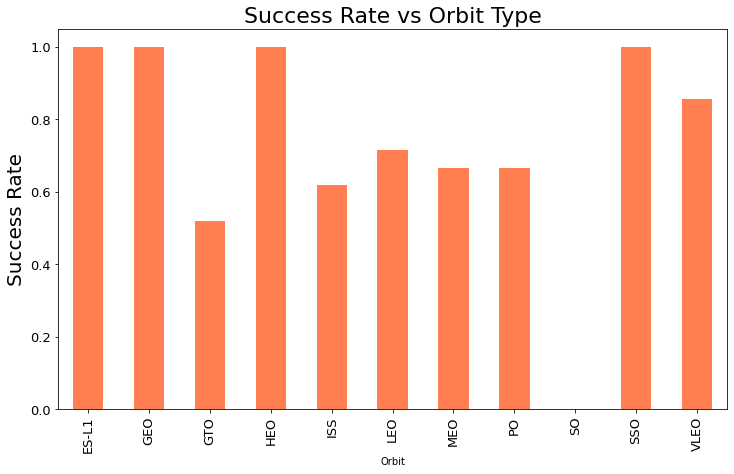

In [6]:
# HINT use groupby method on Orbit column and get the mean of Class column

dfg = df.groupby(['Orbit'])['Class'].mean()

ax = dfg.plot(kind='bar', figsize=(12,7), color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Success Rate vs Orbit Type", fontsize=22)
ax.set_ylabel("Success Rate", fontsize=20);
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


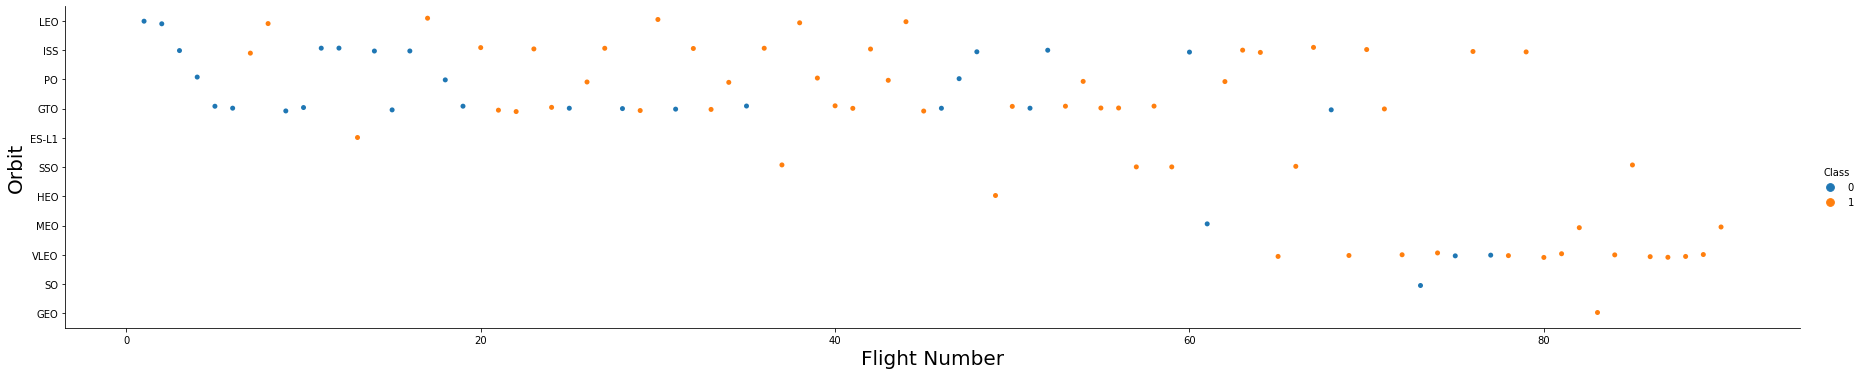

In [7]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


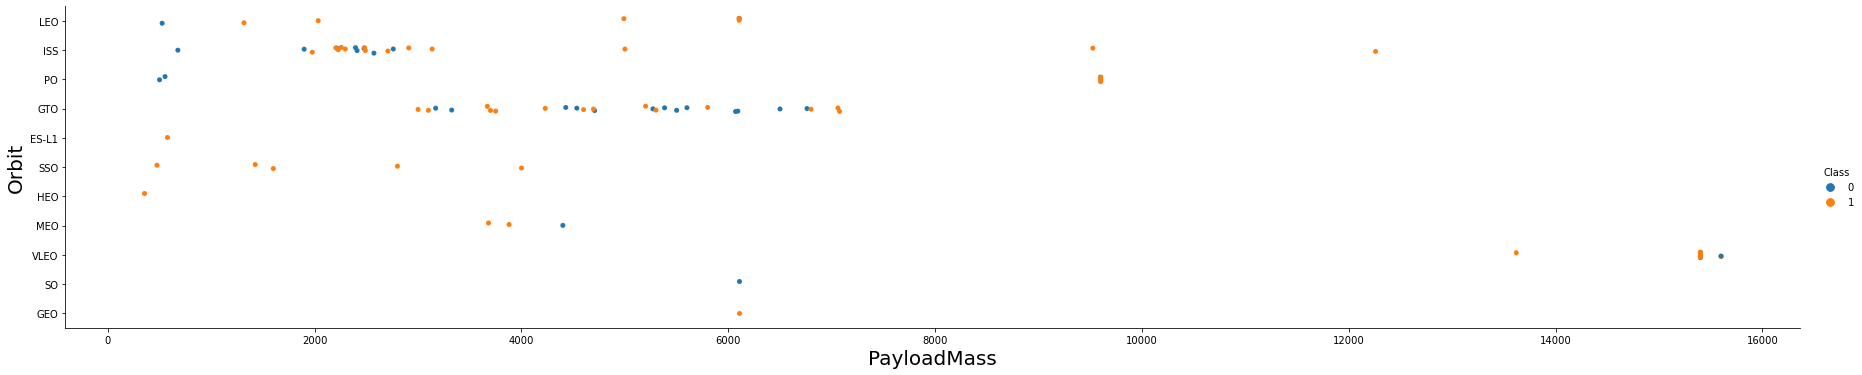

In [8]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

You should observe that Heavy payloads have a negative influence on GTO orbits and positive on GTO and Polar LEO (ISS) orbits.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [13]:
# A function to Extract years from the date 


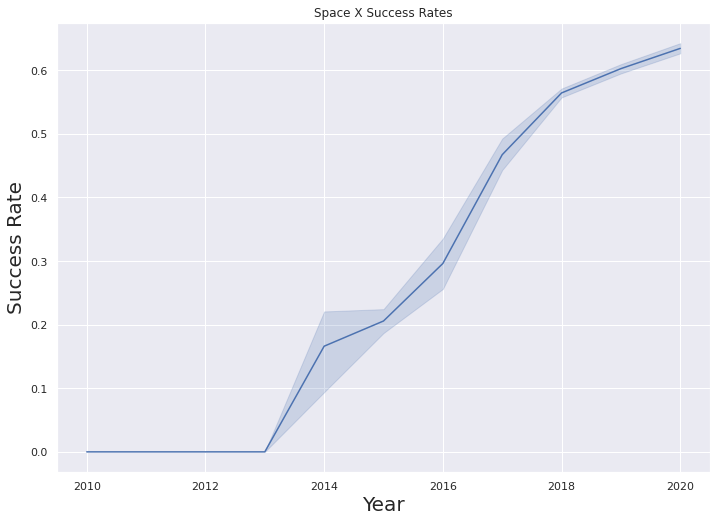

In [14]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
year = pd.DatetimeIndex(df['Date']).year
year = np.array(list(year))
successratelist = []
successrate = 0.00
records = 1
data = 0
for x in df['Class']:
    data = x + data
    successrate = data/records
    successratelist.append(successrate)
    records= records +1
    
successratelist = np.array(successratelist)
d = {'successrate':successratelist,'year':year}
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=d, x="year", y="successrate" )

plt.xlabel("Year",fontsize=20)
plt.title('Space X Success Rates')
plt.ylabel("Success Rate",fontsize=20)
plt.show()



you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [41]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [46]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit','LaunchSite','LandingPad','Serial'], drop_first=True)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [53]:
# HINT: use astype function
features_one_hot2 = features_one_hot.astype('float64')
features_one_hot2.to_csv('dataset_part_3.csv', index=False)


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10        | 1.1     | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
